# Term Frequency
## Different metrics (**Scaled F Score**) to identify top terms instead of count
## Visualize Top Terms

https://github.com/JasonKessler/scattertext#understanding-scaled-f-score

https://nbviewer.jupyter.org/github/JasonKessler/Scattertext-PyData/blob/master/PyData-Scattertext-Part-1.ipynb

In [2]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [3]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
print(all_positive_tweets)
print(all_negative_tweets)
print(len(all_positive_tweets))
print(len(all_negative_tweets))

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

In [5]:
def check_func():
  checking_tweet = all_positive_tweets[1234]
  print(checking_tweet)
check_func()

@leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


In [6]:
import pandas as pd


In [7]:
pos_df = pd.DataFrame(all_positive_tweets)
neg_df = pd.DataFrame(all_negative_tweets)
pos_df.head()
neg_df.head()

,0
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("


# Punctuation, Retweet Symbol, Special Characters, URL, Hashtag, LowerCase

In [8]:
pos_df[0] = pos_df[0].str.replace(r'[^\w\s]+', '')
neg_df[0] = neg_df[0].str.replace(r'[^\w\s]+', '')


# Remove retweet text RT
pattern = re.compile(r'^RT[\s]+')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

# Remove URL
pattern = re.compile(r'^RT[\s]+')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

# Remove Hashtag
pattern = re.compile(r'#')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

#Lowercase
pos_df[0] = pos_df[0].str.lower()
neg_df[0] = neg_df[0].str.lower()

pos_df.head()
neg_df.head()

,0
0,hopeless for tmr
1,everything in the kids section of ikea is so c...
2,hegelbon that heart sliding into the waste bas...
3,ketchburning i hate japanese call him bani \n...
4,dang starting next week i have work


# Stopwords

In [9]:
STOPWORDS = set(stopwords.words('english'))
# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Applying the stopwords to 'text_punct' and store into 'text_stop'
pos_df[0] = pos_df[0].apply(stopwords)
neg_df[0] = neg_df[0].apply(stopwords)

pos_df.head()
neg_df.head()

,0
0,hopeless tmr
1,everything kids section ikea cute shame im nea...
2,hegelbon heart sliding waste basket
3,ketchburning hate japanese call bani
4,dang starting next week work


# Remove Emoji

In [10]:
# Function to remove emoji.
def remove_emoji(string):
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string)

pos_df[0] = pos_df[0].apply(remove_emoji)
neg_df[0] = neg_df[0].apply(remove_emoji)

pos_df.head()
neg_df.head()

,0
0,hopeless tmr
1,everything kids section ikea cute shame im nea...
2,hegelbon heart sliding waste basket
3,ketchburning hate japanese call bani
4,dang starting next week work


# Porter Stemming

In [11]:
Pstemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [Pstemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

pos_df['tweet_stem'] = pos_df[0].apply(stem_sentences)
#pos_df = pos_df.drop(columns=[0]) # Get rid of the unstemmed column.
neg_df['tweet_stem'] = neg_df[0].apply(stem_sentences)
#neg_df = neg_df.drop(columns=[0]) # Get rid of the unstemmed column.

pos_df.head()
neg_df.head()

,0,tweet_stem
0,hopeless tmr,hopeless tmr
1,everything kids section ikea cute shame im nea...,everyth kid section ikea cute shame im nearli ...
2,hegelbon heart sliding waste basket,hegelbon heart slide wast basket
3,ketchburning hate japanese call bani,ketchburn hate japanes call bani
4,dang starting next week work,dang start next week work


In [12]:
neg_df['polarity']=0
pos_df['polarity']=1
pos_df.head()

,0,tweet_stem,polarity
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,1
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,1
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,1
3,97sides congrats,97side congrat,1
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,1


**Create one dataset**

In [13]:
df = pd.DataFrame()
df = df.append(pos_df)
df = df.append(neg_df)
print(df.shape)
df.head()

(10000, 3)


,0,tweet_stem,polarity
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,1
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,1
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,1
3,97sides congrats,97side congrat,1
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,1


## Use CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


In [15]:
CV = CountVectorizer()
CV.fit(df.tweet_stem)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
print(len(CV.get_feature_names()))

19034


In [17]:
neg_matrix = CV.transform(df[df.polarity == 0].tweet_stem)
pos_matrix = CV.transform(df[df.polarity == 1].tweet_stem)
neg_tf = np.sum(neg_matrix,axis=0)
pos_tf = np.sum(pos_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
tf_df = pd.DataFrame([neg,pos],columns=CV.get_feature_names()).transpose()
print(tf_df.head())

                0  1
00              0  1
0001            1  0
00128835        1  0
009             0  1
00962778381838  0  1


### Sort by Total Count

In [18]:
tf_df.columns = ['neg', 'pos']
tf_df['total'] = tf_df['neg'] + tf_df['pos']

tf_df = tf_df.sort_values(by='total', ascending=False)

print(tf_df)

                    neg  pos  total
thank               107  642    749
im                  475  241    716
follow              263  447    710
love                152  399    551
like                221  231    452
...                 ...  ...    ...
httpstcouwsfdaeyzb    0    1      1
httpstcouyofsgibva    1    0      1
httpstcov3jnkwmxcm    0    1      1
httpstcov4jk5hsid1    0    1      1
හවල                   0    1      1

[19034 rows x 3 columns]


### Sort by Postive Count

In [19]:
tf_df = tf_df.sort_values(by='pos', ascending=False)

print(tf_df)

                 neg  pos  total
thank            107  642    749
follow           263  447    710
love             152  399    551
day              150  241    391
im               475  241    716
...              ...  ...    ...
biebsxmoonlight    1    0      1
biebersxgalaxi     1    0      1
bicykiel           1    0      1
waah               1    0      1
bornsinq           1    0      1

[19034 rows x 3 columns]


### Sort by Negative Count

In [20]:
tf_df = tf_df.sort_values(by='neg', ascending=False)

print(tf_df)

          neg  pos  total
im        475  241    716
miss      300   26    326
pleas     273   99    372
follow    263  447    710
want      246   98    344
...       ...  ...    ...
b2b         0    1      1
b2c         0    1      1
axiowolf    0    1      1
axio        0    1      1
mottfre     0    1      1

[19034 rows x 3 columns]


## Find alternative metrics to rank top words
### Positive

In [21]:
tf_df['pos_rate'] = tf_df['pos'] * 1./tf_df['total']
tf_df = tf_df.sort_values(by='pos_rate', ascending=False)
tf_df.head()

,neg,pos,total,pos_rate
mottfre,0,1,1,1.0
zeddba,0,2,2,1.0
thousand,0,2,2,1.0
bailey,0,2,2,1.0
christoph,0,2,2,1.0


In [22]:
tf_df['pos_freq_pct'] = tf_df['pos'] * 1./tf_df['pos'].sum()
tf_df = tf_df.sort_values(by='pos_freq_pct', ascending=False)
tf_df.head()

,neg,pos,total,pos_rate,pos_freq_pct
thank,107,642,749,0.857143,0.018749
follow,263,447,710,0.629577,0.013054
love,152,399,551,0.724138,0.011652
im,475,241,716,0.336592,0.007038
day,150,241,391,0.616368,0.007038


Lets combine pos_rate and pos_freq_pct<br/>
pos_rate is 0 to 1, pos_freq_pct is 0 to o.15<br/>
To avoid pos_rate dominance, we need hermonic mean of the terms

In [23]:
from scipy.stats import hmean
tf_df['pos_hmean'] = tf_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
tf_df = tf_df.sort_values(by='pos_hmean', ascending=False)

tf_df.head(10)

,neg,pos,total,pos_rate,pos_freq_pct,pos_hmean
thank,107,642,749,0.857143,0.018749,0.036695
follow,263,447,710,0.629577,0.013054,0.025578
love,152,399,551,0.724138,0.011652,0.022936
day,150,241,391,0.616368,0.007038,0.013917
im,475,241,716,0.336592,0.007038,0.013788
good,100,237,337,0.703264,0.006921,0.013708
like,221,231,452,0.511062,0.006746,0.013316
happi,25,211,236,0.894068,0.006162,0.012240
get,233,209,442,0.472851,0.006104,0.012052
see,125,185,310,0.596774,0.005403,0.010708


For more reliable metric, we need CDF (Cumulative Distribution Function)

In [24]:
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

tf_df['pos_rate_normcdf'] = normcdf(tf_df['pos_rate'])
tf_df['pos_freq_pct_normcdf'] = normcdf(tf_df['pos_freq_pct'])
tf_df['pos_normcdf_hmean'] = hmean([tf_df['pos_rate_normcdf'], tf_df['pos_freq_pct_normcdf']])
tf_df.sort_values(by='pos_normcdf_hmean',ascending=False)

tf_df.head(10)

,neg,pos,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
thank,107,642,749,0.857143,0.018749,0.036695,0.735310,1.0,0.847468
follow,263,447,710,0.629577,0.013054,0.025578,0.555191,1.0,0.713985
love,152,399,551,0.724138,0.011652,0.022936,0.634000,1.0,0.776010
day,150,241,391,0.616368,0.007038,0.013917,0.543929,1.0,0.704604
im,475,241,716,0.336592,0.007038,0.013788,0.311259,1.0,0.474748
good,100,237,337,0.703264,0.006921,0.013708,0.616960,1.0,0.763111
like,221,231,452,0.511062,0.006746,0.013316,0.453633,1.0,0.624137
happi,25,211,236,0.894068,0.006162,0.012240,0.760678,1.0,0.864074
get,233,209,442,0.472851,0.006104,0.012052,0.421213,1.0,0.592751
see,125,185,310,0.596774,0.005403,0.010708,0.527160,1.0,0.690379


## Find alternative metrics to rank top words
### Negative

In [25]:
tf_df['neg_rate'] = tf_df['neg'] * 1./tf_df['total']
tf_df['neg_freq_pct'] = tf_df['neg'] * 1./tf_df['neg'].sum()
tf_df['neg_hmean'] = tf_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
tf_df['neg_rate_normcdf'] = normcdf(tf_df['neg_rate'])
tf_df['neg_freq_pct_normcdf'] = normcdf(tf_df['neg_freq_pct'])
tf_df['neg_normcdf_hmean'] = hmean([tf_df['neg_rate_normcdf'], tf_df['neg_freq_pct_normcdf']])
tf_df = tf_df.sort_values(by='neg_normcdf_hmean', ascending=False)

tf_df.head(10)

,neg,pos,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
wi,36,0,36,0.000000,0.000000,0.000000,0.111748,0.429366,0.177340,1.000000,0.001165,0.002326,0.888252,0.999931,0.940789
ll,35,0,35,0.000000,0.000000,0.000000,0.111748,0.429366,0.177340,1.000000,0.001132,0.002262,0.888252,0.999892,0.940772
justi,35,0,35,0.000000,0.000000,0.000000,0.111748,0.429366,0.177340,1.000000,0.001132,0.002262,0.888252,0.999892,0.940772
beli,35,0,35,0.000000,0.000000,0.000000,0.111748,0.429366,0.177340,1.000000,0.001132,0.002262,0.888252,0.999892,0.940772
ev,35,0,35,0.000000,0.000000,0.000000,0.111748,0.429366,0.177340,1.000000,0.001132,0.002262,0.888252,0.999892,0.940772
zayniscomingbackonjuly26,23,0,23,0.000000,0.000000,0.000000,0.111748,0.429366,0.177340,1.000000,0.000744,0.001487,0.888252,0.991094,0.936859
sad,119,5,124,0.040323,0.000146,0.000291,0.129147,0.624265,0.214018,0.959677,0.003849,0.007668,0.870853,1.000000,0.930969
ugh,25,1,26,0.038462,0.000029,0.000058,0.128305,0.468496,0.201442,0.961538,0.000809,0.001616,0.871695,0.995218,0.929370
aw,42,3,45,0.066667,0.000088,0.000175,0.141481,0.547293,0.224839,0.933333,0.001359,0.002713,0.858519,0.999996,0.923873
miss,300,26,326,0.079755,0.000759,0.001504,0.147896,0.991676,0.257404,0.920245,0.009704,0.019206,0.852104,1.000000,0.920147


## Visualization

In [26]:
tf_df.shape

(19034, 15)

In [27]:
import seaborn as sns

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

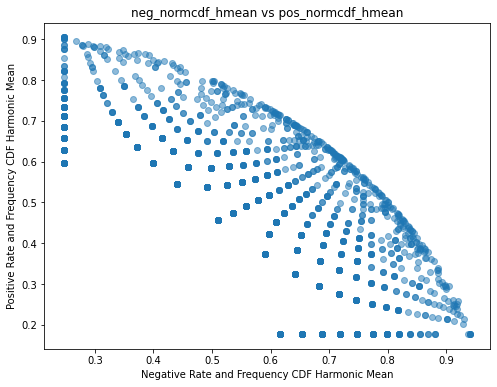

In [28]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=tf_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [29]:
!pip install bokeh

In [30]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(tf_df.pos_normcdf_hmean), high=max(tf_df.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=tf_df,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)